# Granger Causality

In [2]:
import numpy as np
import pandas as pd
import math

### Generating a data set

In [3]:
# generate transition matrix, time lag 2
np.random.seed(3)
A = 0.5*np.random.rand(2,4)
A[0,1] = 0
A[0,3] = 0
print("Ground truth transition matrix:")
print(A)

# generate time series
T = 1000
data = np.random.rand(2, T)
data[:,2:] = 0
#print(data)
for i in range(2,T):
    data[:,i] = A[:,0:2].dot(data[:,i-1]) + A[:,2:4].dot(data[:,i-2]) + 0.1 * np.random.randn(2)

p_value_matrix_truth = np.array([[0, 0.5989, 0, 0.5397], [0.0006, 0, 0.0014, 0]])
print("Ground truth p-value matrix:")
print(p_value_matrix_truth)

adj_matrix_truth = np.array([[1, 0, 1, 0], [1, 1, 1, 1]])
print("Ground truth Adjacency matrix:")
print(adj_matrix_truth)



Ground truth transition matrix:
[[0.27539895 0.         0.14545237 0.        ]
 [0.44647348 0.44814654 0.06279266 0.10362144]]
Ground truth p-value matrix:
[[0.     0.5989 0.     0.5397]
 [0.0006 0.     0.0014 0.    ]]
Ground truth Adjacency matrix:
[[1 0 1 0]
 [1 1 1 1]]


Granger causality check the both direction of x1->x2 and x2->x1.

When testing for Granger causality, we test the null hypothesis of non-causality which means that we check if the coefficients for linear regression of the effect are zero.


In [4]:
from causallearn.search.Granger.Granger import Granger
G = Granger()
p_value_matrix = G.granger_test_2d(data.T)
coeff = G.granger_lasso(data.T)

/Users/rena/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [5]:
p_value_matrix


(array([[0.    , 0.1494, 0.    , 0.332 ],
        [0.    , 0.    , 0.    , 0.    ]]),
 array([[1, 0, 1, 0],
        [1, 1, 1, 1]]))

p_value_matrix: [P_1,P_2,...], where P_k is the p value matrix for the k-th time lag. The ij-th element in P_k is the pvalue of influence from variable j to variable i. Note: a small p value means significant relation.

adj_matrix: [A_1,A_2,...], where A_k is the adjacency matrix for the k-th time lag. The ij-th element in A_k is the influence from variable j to variable i.

In [6]:
coeff

array([[ 0.26162997,  0.        ,  0.14387792, -0.02806725],
       [ 0.45502316,  0.49993447,  0.08465351,  0.06992522]])

coeff: coefficient matrix [C_1, C_2, ..], where C_k is the dx1 causal matrix for the k-th time lag. The ij-th entry in C_k represents the causal influence from j-th variable to the i-th variable.

As you can see the result is very close to the ground truth. 

<div class="alert alert-block alert-warning">
Task: Calculate the granger causality in following dataset. The dataset corresponds to monthly anti-diabetic drug sales in Australia from 1992 to 2008. Do you think the month parameter has significant influence on the sale value? 
</div>

In [7]:
df = pd.read_csv('a10.csv', parse_dates=['date'])
df['month'] = df.date.dt.month
df.head()

,date,value,month
0,1991-07-01,3.526591,7
1,1991-08-01,3.180891,8
2,1991-09-01,3.252221,9
3,1991-10-01,3.611003,10
4,1991-11-01,3.565869,11


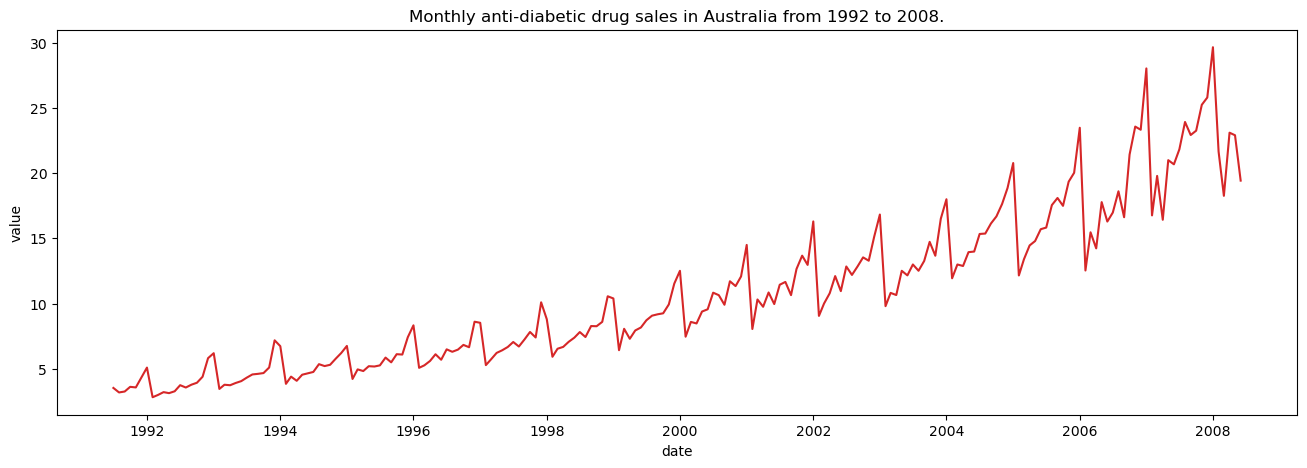

In [8]:
import matplotlib.pyplot as plt
 
# Draw Plot
def plot_data(data, x, y, title="", xlabel='date', ylabel='value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
 
plot_data(df, x=df.date, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.') 
plt.show()

In [9]:
# Extract relevant columns for Granger causality test
dataset = df[['value', 'month']].to_numpy()

In [27]:
import pandas as pd
import numpy as np
from causallearn.search.Granger.Granger import Granger
import matplotlib.pyplot as plt

# Extract relevant columns for Granger causality test
dataset = df[['value', 'month']].to_numpy()

G = Granger()
p_value_matrix = G.granger_test_2d(dataset)

# Print the p-value matrix
print("Granger Causality Test P-Value Matrix and Adjacency Matrix:")
print(p_value_matrix)

# Perform Granger causality with Lasso truncating penalty
coeff = G.granger_lasso(dataset)

# Print the Granger Lasso coefficients
print("\nGranger Lasso Coefficients First time lag:")
print(coeff[:,0:2])
print("\nGranger Lasso Coefficients Second time lag:")
print(coeff[:,2:4])

Granger Causality Test P-Value Matrix and Adjacency Matrix:
(array([[0.    , 0.    , 0.    , 0.    ],
       [0.1794, 0.    , 0.6124, 0.    ]]), array([[1, 1, 1, 1],
       [0, 1, 0, 1]]))

Granger Lasso Coefficients First time lag:
[[ 0.65678899  0.54777285]
 [-0.          0.60111743]]

Granger Lasso Coefficients Second time lag:
[[ 0.33077295 -0.37778536]
 [-0.02945794 -0.14626401]]


/Users/rena/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [30]:
#Based on the causallearn documentation
#p_value_matrix: p values for x1->x2 and x2->x1 
#(for ‘granger_test_2d’, which is the granger causality test for two-dimensional time series).

#The Granger Lasso Coefficients suggest varying degrees of 
#influence among the variables.

#In this library, we see results for two time lags.
#The first four values correspond to the first time lag. The rest to the second time lag. 
#We can see self dependency for value, and for month (0.66,0.33 and 0.6, -0.14).
print('For both time lags, value does not depend on month (0 and close to it -0.3).')
#For both time lags, month depends on value (0.55,-0.37?).
#I am not sure what the physical meaning of that is.

For both time lags, value does not depend on month (0 and close -0.3).
